FAKE REVIEW DETECTION

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re
import string
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("fake reviews dataset.csv")

In [4]:
data.head(10)

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
5,Home_and_Kitchen_5,3.0,CG,I WANTED DIFFERENT FLAVORS BUT THEY ARE NOT.
6,Home_and_Kitchen_5,5.0,CG,They are the perfect touch for me and the only...
7,Home_and_Kitchen_5,3.0,CG,These done fit well and look great. I love th...
8,Home_and_Kitchen_5,5.0,CG,"Great big numbers & easy to read, the only thi..."
9,Home_and_Kitchen_5,5.0,CG,My son loves this comforter and it is very wel...


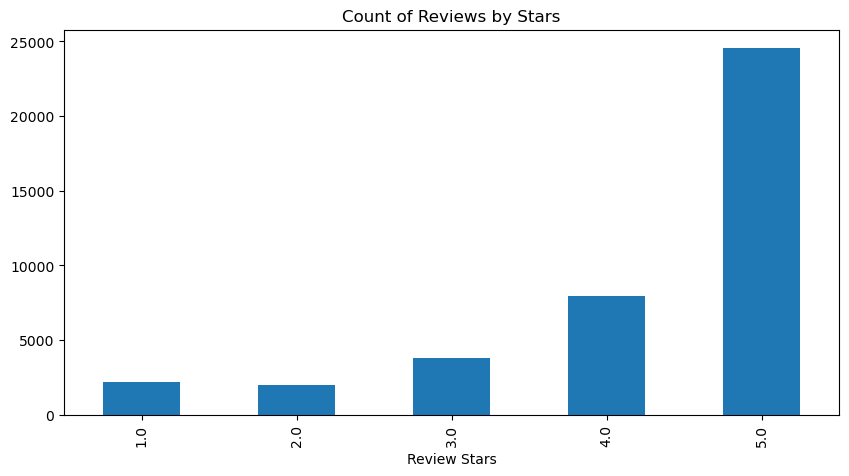

In [5]:
ax = data['rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [6]:
data.shape

(40432, 4)

In [7]:
data.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [10]:
data.shape

(40432, 4)

In [11]:
new_data = data.drop(["category", "rating"], axis=1)
new_data.head(10)

,label,text_
0,CG,"Love this! Well made, sturdy, and very comfor..."
1,CG,"love it, a great upgrade from the original. I..."
2,CG,This pillow saved my back. I love the look and...
3,CG,"Missing information on how to use it, but it i..."
4,CG,Very nice set. Good quality. We have had the s...
5,CG,I WANTED DIFFERENT FLAVORS BUT THEY ARE NOT.
6,CG,They are the perfect touch for me and the only...
7,CG,These done fit well and look great. I love th...
8,CG,"Great big numbers & easy to read, the only thi..."
9,CG,My son loves this comforter and it is very wel...


In [12]:
import nltk
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def text_cleaning(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)   
    return text

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\sri ram/nltk_data'
    - 'C:\\ProgramData\\anaconda3\\nltk_data'
    - 'C:\\ProgramData\\anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\sri ram\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
new_data['text_'] = new_data["text_"].apply(text_cleaning)

In [13]:
new_data.head(20)

,label,text_
0,CG,"Love this! Well made, sturdy, and very comfor..."
1,CG,"love it, a great upgrade from the original. I..."
2,CG,This pillow saved my back. I love the look and...
3,CG,"Missing information on how to use it, but it i..."
4,CG,Very nice set. Good quality. We have had the s...
5,CG,I WANTED DIFFERENT FLAVORS BUT THEY ARE NOT.
6,CG,They are the perfect touch for me and the only...
7,CG,These done fit well and look great. I love th...
8,CG,"Great big numbers & easy to read, the only thi..."
9,CG,My son loves this comforter and it is very wel...


In [14]:
new_data = new_data.head(40400)
new_data = new_data.sample(frac=1)

In [15]:

new_data.to_csv("cleandata.csv", index=False)

In [16]:
cleandata = pd.read_csv("cleandata.csv")
cleandata.shape

(40400, 2)

In [15]:
cleandata['id'] = range(1, len(cleandata) + 1)
cleandata.head(10)

,label,text_,id
0,OR,cat hate thing cheapli construct velcro edg sh...,1
1,OR,great look non power cabl go wall one behind h...,2
2,OR,like casebut green color bright onlin lighter ...,3
3,OR,great light bright light weight love adjust f...,4
4,CG,actual second time use spatula need use one bo...,5
5,CG,bought daughter love also love music,6
6,CG,bit small wide brim im sure brim fitsi bought ...,7
7,OR,perfect condit exact pictur describ pleas purchas,8
8,CG,set expect straight impress addit collect inte...,9
9,OR,bought child second month life even enjoy olde...,10


In [20]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/Ram/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [21]:
import torch
print(torch.__version__)

2.1.1+cu121


In [22]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [23]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [24]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [25]:
scores = polarity_scores_roberta('I am very satisfied with the product')
print(scores)

{'roberta_neg': 0.0018941411, 'roberta_neu': 0.017028842, 'roberta_pos': 0.981077}


In [ ]:
# data['id'] = range(1, len(data) + 1)
# res = {}
# for i, row in tqdm(data.iterrows(), total=len(data)):
#     text = row['text_']
#     myid = row['id']
#     res[myid] = sia.polarity_scores(text)
res = {}
for i, row in tqdm(cleandata.iterrows(), total=len(cleandata)):
    try:
        text = row['text_']
        myid = row['id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/40400 [00:00<?, ?it/s]

In [26]:
import pickle

In [27]:
with open('sentiment_dictionary.pkl', 'wb') as f:
    pickle.dump(res, f)


NameError: name 'res' is not defined

In [29]:
with open('sentiment_dictionary.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

EOFError: Ran out of input

In [ ]:
vaders = pd.DataFrame(loaded_dict).T
vaders = vaders.reset_index().rename(columns={'index': 'id'})
vaders = vaders.merge(cleandata, how='left')

In [24]:
vaders.head(30)

,id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,label,text_
0,1,0.000,0.423,0.577,0.8481,0.003169,0.040787,0.956044,CG,work great wish littl wideveri good qualitynic...
1,2,0.000,0.857,0.143,0.6124,0.031190,0.695863,0.272948,CG,beat bo alreadi one left total awesom cute det...
2,3,0.000,0.473,0.527,0.9694,0.002077,0.014343,0.983580,CG,love girl troubl world becom one power
3,4,0.099,0.613,0.288,0.9735,0.009373,0.104769,0.885858,CG,top super sexi look great materi thick enough ...
4,5,0.000,0.595,0.405,0.9325,0.003166,0.021082,0.975752,OR,tri recommend bob obrian luthier mercantil int...
5,6,0.325,0.542,0.133,-0.7506,0.484996,0.473063,0.041940,OR,got box partner organ game piec like custom si...
6,7,0.053,0.811,0.136,0.4767,0.215176,0.745785,0.039039,OR,best pocket radio ive own far complaint non li...
7,8,0.000,0.392,0.608,0.9260,0.003055,0.055128,0.941817,CG,humor book author academ histori histori mast...
8,9,0.000,0.635,0.365,0.7845,0.007693,0.051539,0.940768,CG,stori entertain movi admit one favorit movi mo...
9,10,0.000,0.297,0.703,0.7964,0.101353,0.614513,0.284133,CG,huge hold well two larg bowl right size top ...


In [85]:
vaders['roberta_compound'] = vaders.apply(lambda row: row['roberta_pos'] - row['roberta_neg'], axis=1)
vaders = vaders[['id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'roberta_compound', 'label', 'text_']]
vaders.head(10)

,id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,roberta_compound,label,text_
0,1,0.000,0.423,0.577,0.8481,0.003169,0.040787,0.956044,0.952875,CG,work great wish littl wideveri good qualitynic...
1,2,0.000,0.857,0.143,0.6124,0.031190,0.695863,0.272948,0.241758,CG,beat bo alreadi one left total awesom cute det...
2,3,0.000,0.473,0.527,0.9694,0.002077,0.014343,0.983580,0.981503,CG,love girl troubl world becom one power
3,4,0.099,0.613,0.288,0.9735,0.009373,0.104769,0.885858,0.876486,CG,top super sexi look great materi thick enough ...
4,5,0.000,0.595,0.405,0.9325,0.003166,0.021082,0.975752,0.972586,OR,tri recommend bob obrian luthier mercantil int...
5,6,0.325,0.542,0.133,-0.7506,0.484996,0.473063,0.041940,-0.443056,OR,got box partner organ game piec like custom si...
6,7,0.053,0.811,0.136,0.4767,0.215176,0.745785,0.039039,-0.176138,OR,best pocket radio ive own far complaint non li...
7,8,0.000,0.392,0.608,0.9260,0.003055,0.055128,0.941817,0.938762,CG,humor book author academ histori histori mast...
8,9,0.000,0.635,0.365,0.7845,0.007693,0.051539,0.940768,0.933075,CG,stori entertain movi admit one favorit movi mo...
9,10,0.000,0.297,0.703,0.7964,0.101353,0.614513,0.284133,0.182780,CG,huge hold well two larg bowl right size top ...


In [188]:
x = vaders["roberta_compound"]
y = vaders["label"]

In [189]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .25)

In [190]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [191]:
# vectorization = TfidfVectorizer()
# xv_train = vectorization.fit_transform(x_train)
# xv_test = vectorization.transform(x_test)
import numpy as np
xv_train_np = np.array(x_train).reshape(-1, 1)
xv_test_np = np.array(x_test).reshape(-1, 1)

Logistic Regression

In [192]:
from sklearn.linear_model import LogisticRegression

In [193]:
LR = LogisticRegression()
#LR.fit(xv_train, y_train)
LR.fit(xv_train_np, y_train)

LogisticRegression()

In [194]:
#LR.score(xv_test, y_test)
LR.score(xv_test_np, y_test)

0.5033663366336634

In [195]:
#pred_LR = LR.predict(xv_test)
pred_LR = LR.predict(xv_test_np)

In [196]:
xv_test_np

array([[ 0.95520374],
       [-0.0987957 ],
       [ 0.79495333],
       ...,
       [ 0.58272654],
       [-0.02945596],
       [ 0.91722193]])

In [197]:
print(classification_report(y_test, pred_LR))

              precision    recall  f1-score   support

          CG       0.50      0.62      0.55      5036
          OR       0.51      0.39      0.44      5064

    accuracy                           0.50     10100
   macro avg       0.50      0.50      0.50     10100
weighted avg       0.50      0.50      0.50     10100



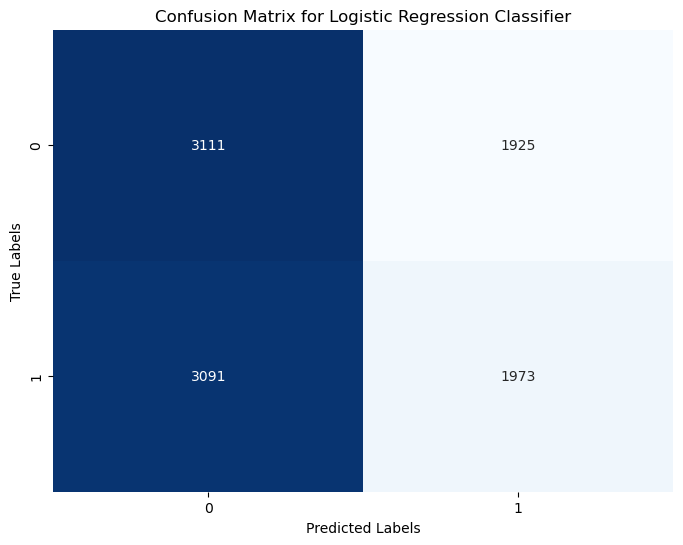

In [198]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have already trained the Naive Bayes classifier and made predictions

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred_LR)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Logistic Regression Classifier")
plt.show()

Decision Tree Classification

In [199]:
from sklearn.tree import DecisionTreeClassifier

In [200]:
DT = DecisionTreeClassifier()
#DT.fit(xv_train, y_train)
DT.fit(xv_train_np, y_train)

DecisionTreeClassifier()

In [201]:
#pred_dt = DT.predict(xv_test)
pred_dt = DT.predict(xv_test_np)

In [202]:
#DT.score(xv_test, y_test)
DT.score(xv_test_np, y_test)

0.5042574257425743

In [203]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

          CG       0.50      0.50      0.50      5036
          OR       0.51      0.51      0.51      5064

    accuracy                           0.50     10100
   macro avg       0.50      0.50      0.50     10100
weighted avg       0.50      0.50      0.50     10100



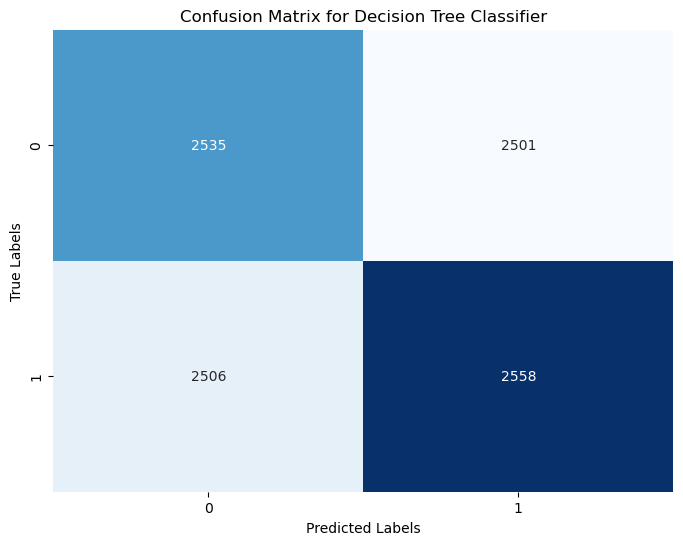

In [204]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have already trained the Naive Bayes classifier and made predictions

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred_dt)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

Random Forest Classifier

In [205]:
from sklearn.ensemble import RandomForestClassifier

In [206]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train_np, y_train)

RandomForestClassifier(random_state=0)

In [207]:
pred_rfc = RFC.predict(xv_test_np)

In [208]:
RFC.score(xv_test_np, y_test)

0.5038613861386139

In [209]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

          CG       0.50      0.50      0.50      5036
          OR       0.51      0.51      0.51      5064

    accuracy                           0.50     10100
   macro avg       0.50      0.50      0.50     10100
weighted avg       0.50      0.50      0.50     10100



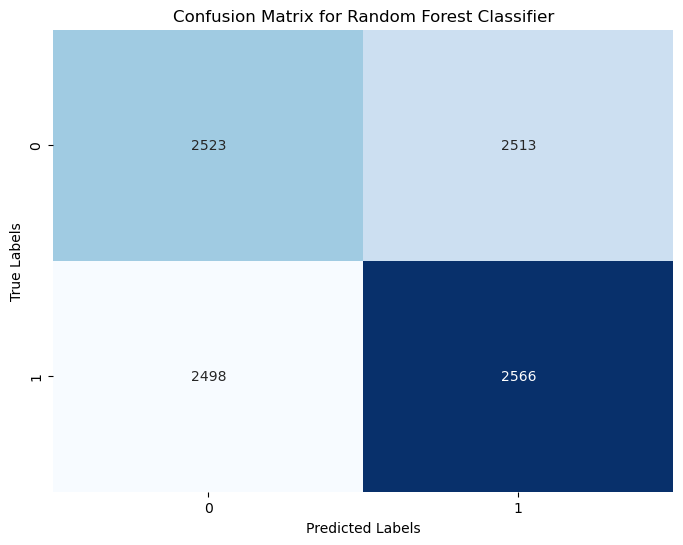

In [210]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have already trained the Naive Bayes classifier and made predictions

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred_rfc)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

Support Vector Machine Classifier

In [211]:
from sklearn.svm import SVC

In [212]:
SVM = SVC(kernel='linear', random_state=0)
SVM.fit(xv_train_np, y_train)

SVC(kernel='linear', random_state=0)

In [213]:
pred_svm = SVM.predict(xv_test_np)

In [214]:
SVM.score(xv_test_np, y_test)

0.4985148514851485

In [215]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

          CG       0.50      0.76      0.60      5036
          OR       0.50      0.24      0.32      5064

    accuracy                           0.50     10100
   macro avg       0.50      0.50      0.46     10100
weighted avg       0.50      0.50      0.46     10100



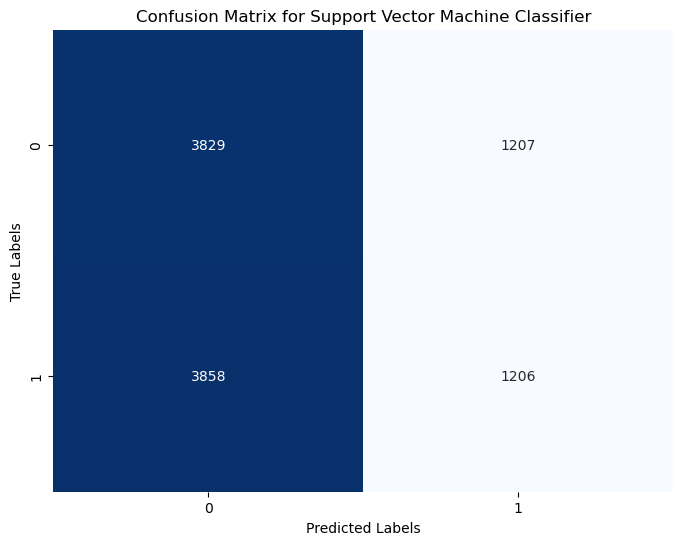

In [216]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have already trained the Naive Bayes classifier and made predictions

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred_svm)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Support Vector Machine Classifier")
plt.show()

k-Nearest Neighbors Classifier

In [217]:
from sklearn.neighbors import KNeighborsClassifier

In [218]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(xv_train_np, y_train)

KNeighborsClassifier()

In [219]:
pred_knn = KNN.predict(xv_test_np)

In [220]:
KNN.score(xv_test_np, y_test)

0.5022772277227723

In [221]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

          CG       0.50      0.51      0.51      5036
          OR       0.50      0.49      0.50      5064

    accuracy                           0.50     10100
   macro avg       0.50      0.50      0.50     10100
weighted avg       0.50      0.50      0.50     10100



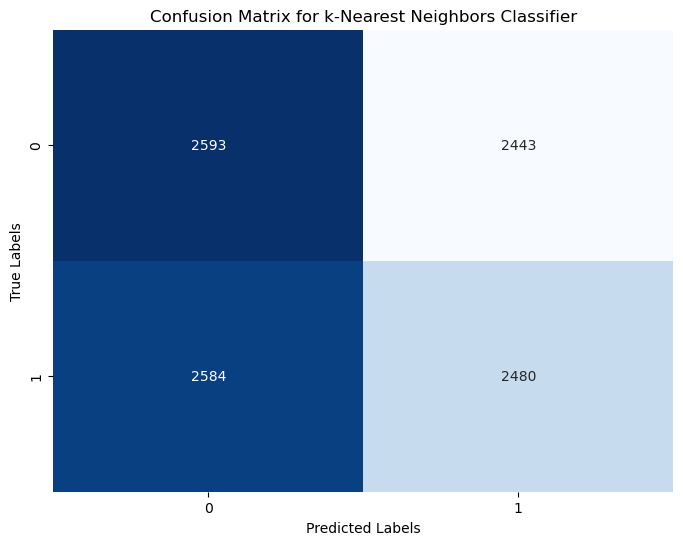

In [222]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have already trained the Naive Bayes classifier and made predictions

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred_knn)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for k-Nearest Neighbors Classifier")
plt.show()

Naive Bayes Classifier

In [223]:
#from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

In [224]:
# NB = MultinomialNB()
# NB.fit(xv_train_np, y_train)
NB = GaussianNB()
NB.fit(xv_train_np, y_train)

GaussianNB()

In [225]:
pred_nb = NB.predict(xv_test_np)

In [226]:
NB.score(xv_test_np, y_test)

0.5035643564356436

In [227]:
print(classification_report(y_test, pred_nb))

              precision    recall  f1-score   support

          CG       0.50      0.62      0.55      5036
          OR       0.51      0.39      0.44      5064

    accuracy                           0.50     10100
   macro avg       0.50      0.50      0.50     10100
weighted avg       0.50      0.50      0.50     10100



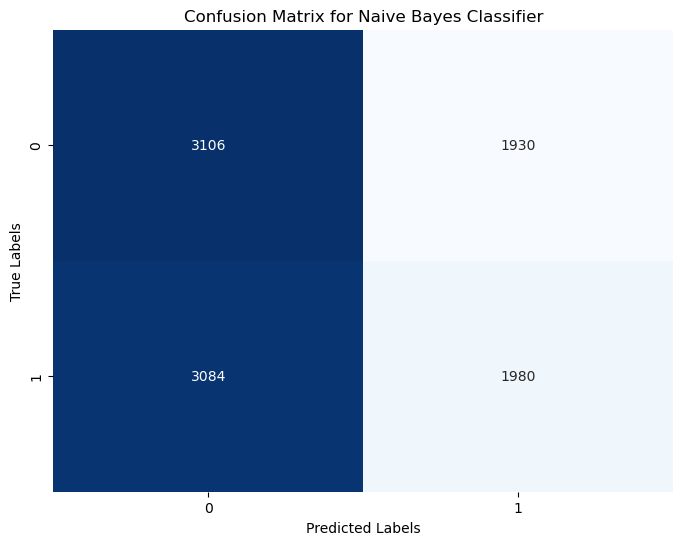

In [228]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have already trained the Naive Bayes classifier and made predictions

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred_nb)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.show()

In [246]:
def output_lable(n):
    if n == 'CG':
        return "Fake Review"
    elif n == 'OR':
        return "Not A Fake Review"

def calculate_compound(scores_dict):
    roberta_neg = scores_dict['roberta_neg']
    roberta_neu = scores_dict['roberta_neu']
    roberta_pos = scores_dict['roberta_pos']

    # Calculate compound score
    compound = roberta_pos - roberta_neg

    return compound

def manual_testing(review):
    testing_news = {"text":[review]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(text_cleaning) 
    new_x_test = new_def_test["text"]
    #new_xv_test = vectorization.transform(new_x_test)
    #vader
    #new_xv_test = new_x_test.apply(lambda x: sia.polarity_scores(x)['compound'])
    #roberta
    scores_dict = new_x_test.apply(lambda x: polarity_scores_roberta(x))
    print(scores_dict)
    new_xv_test = calculate_compound(scores_dict)
    new_xv_test_array = np.array(new_xv_test).reshape(1, -1)
    pred_LR = LR.predict(new_xv_test_array)
    pred_DT = DT.predict(new_xv_test_array)
    pred_RFC = RFC.predict(new_xv_test_array)
    pred_SVM = SVM.predict(new_xv_test_array)
    pred_KNN = KNN.predict(new_xv_test_array)
    pred_NB = NB.predict(new_xv_test_array)
    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nRFC Prediction: {} \nSVM Prediction: {} \nKNN Prediction: {} \nNB Prediction: {} ".format(output_lable(pred_LR[0]), 
                                                                                                              output_lable(pred_DT[0]),
                                                                                                              output_lable(pred_RFC[0]),
                                                                                                              output_lable(pred_SVM[0]),
                                                                                                              output_lable(pred_KNN[0]),output_lable(pred_NB[0])))

In [247]:
review = input()
manual_testing(review)

The 3000mAh battery capacity of this phone is impressive. It lasts a full day with a single charge, allowing me to enjoy worry-free outdoor activities without constantly worrying about the battery life. Truly a reliable companion!


KeyError: 'roberta_neg'